In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras import layers
from keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

import itertools

In [3]:
X=np.load("X.npy")
y=np.load("Y.npy")
print("The dataset loaded...")

The dataset loaded...


In [7]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validation Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validation Accuracy"]=modelHistory.history['val_accuracy']
    
    fig, axarr=plt.subplots(nrows=2, ncols=1 ,figsize=(12,8))
    axarr[0].set_title("History of Loss in Train and Validation Datasets")
    history[["Train Loss", "Validation Loss"]].plot(ax=axarr[0])
    axarr[1].set_title("History of Accuracy in Train and Validation Datasets")
    history[["Train Accuracy", "Validation Accuracy"]].plot(ax=axarr[1]) 
    plt.suptitle(" Convulutional Model {} Loss and Accuracy in Train and Validation Datasets".format(model_name))
    plt.show()

In [34]:
from keras.callbacks import EarlyStopping
def split_dataset(X, y, test_size=0.2, random_state=42):
    X_conv=X.reshape(X.shape[0], X.shape[1], X.shape[2],1)
    
    

    return train_test_split(X_conv,y, stratify=y,test_size=test_size,random_state=random_state)

def evaluate_conv_model(model, model_name, X, y, epochs=100,
                        optimizer=optimizers.RMSprop(lr=0.0001), callbacks=None):
    print("[INFO]:Convolutional Model {} created...".format(model_name))
   
    
    
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    print("[INFO]:Convolutional Model {} compiled...".format(model_name))
    
    print("[INFO]:Convolutional Model {} training....".format(model_name))
    earlyStopping = EarlyStopping(monitor = 'val_loss', patience=20, verbose = 1) 
    if callbacks is None:
        callbacks = [earlyStopping]
    modelHistory=model.fit(X_train, y_train, 
             validation_data=(X_test, y_test),
             callbacks=callbacks,
             epochs=epochs,
             verbose=0)
    print("[INFO]:Convolutional Model {} trained....".format(model_name))

    test_scores=model.evaluate(X_test, y_test, verbose=0)
    train_scores=model.evaluate(X_train, y_train, verbose=0)
    print("[INFO]:Train Accuracy:{:.3f}".format(train_scores[1]))
    print("[INFO]:Validation Accuracy:{:.3f}".format(test_scores[1]))
    
    show_model_history(modelHistory=modelHistory, model_name=model_name)
    return model

In [35]:
def decode_OneHotEncoding(label):
    label_new=list()
    for target in label:
        label_new.append(np.argmax(target))
    label=np.array(label_new)
    
    return label
def correct_mismatches(label):
    label_map={0:9,1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2, 9:5}
    label_new=list()
    for s in label:
        label_new.append(label_map[s])
    label_new=np.array(label_new)
    
    return label_new
    
def show_image_classes(image, label, n=10):
    label=decode_OneHotEncoding(label)
    label=correct_mismatches(label)
    fig, axarr=plt.subplots(nrows=n, ncols=n, figsize=(18, 18))
    axarr=axarr.flatten()
    plt_id=0
    start_index=0
    for sign in range(10):
        sign_indexes=np.where(label==sign)[0]
        for i in range(n):

            image_index=sign_indexes[i]
            axarr[plt_id].imshow(image[image_index], cmap='gray')
            axarr[plt_id].set_xticks([])
            axarr[plt_id].set_yticks([])
            axarr[plt_id].set_title("Sign :{}".format(sign))
            plt_id=plt_id+1
    plt.suptitle("{} Sample for Each Classes".format(n))
    plt.show()

In [36]:
number_of_pixels=X.shape[1]*X.shape[2]
number_of_classes=y.shape[1]
print(20*"*", "SUMMARY of the DATASET",20*"*")
print("an image size:{}x{}".format(X.shape[1], X.shape[2]))
print("number of pixels:",number_of_pixels)
print("number of classes:",number_of_classes)

y_decoded=decode_OneHotEncoding(y.copy())
sample_per_class=np.unique(y_decoded, return_counts=True)
print("Number of Samples:{}".format(X.shape[0]))
for sign, number_of_sample in zip(sample_per_class[0], sample_per_class[1]):
    print("  {} sign has {} samples.".format(sign, number_of_sample))
print(65*"*")

******************** SUMMARY of the DATASET ********************
an image size:64x64
number of pixels: 4096
number of classes: 10
Number of Samples:2062
  0 sign has 204 samples.
  1 sign has 205 samples.
  2 sign has 206 samples.
  3 sign has 207 samples.
  4 sign has 206 samples.
  5 sign has 208 samples.
  6 sign has 207 samples.
  7 sign has 206 samples.
  8 sign has 206 samples.
  9 sign has 207 samples.
*****************************************************************


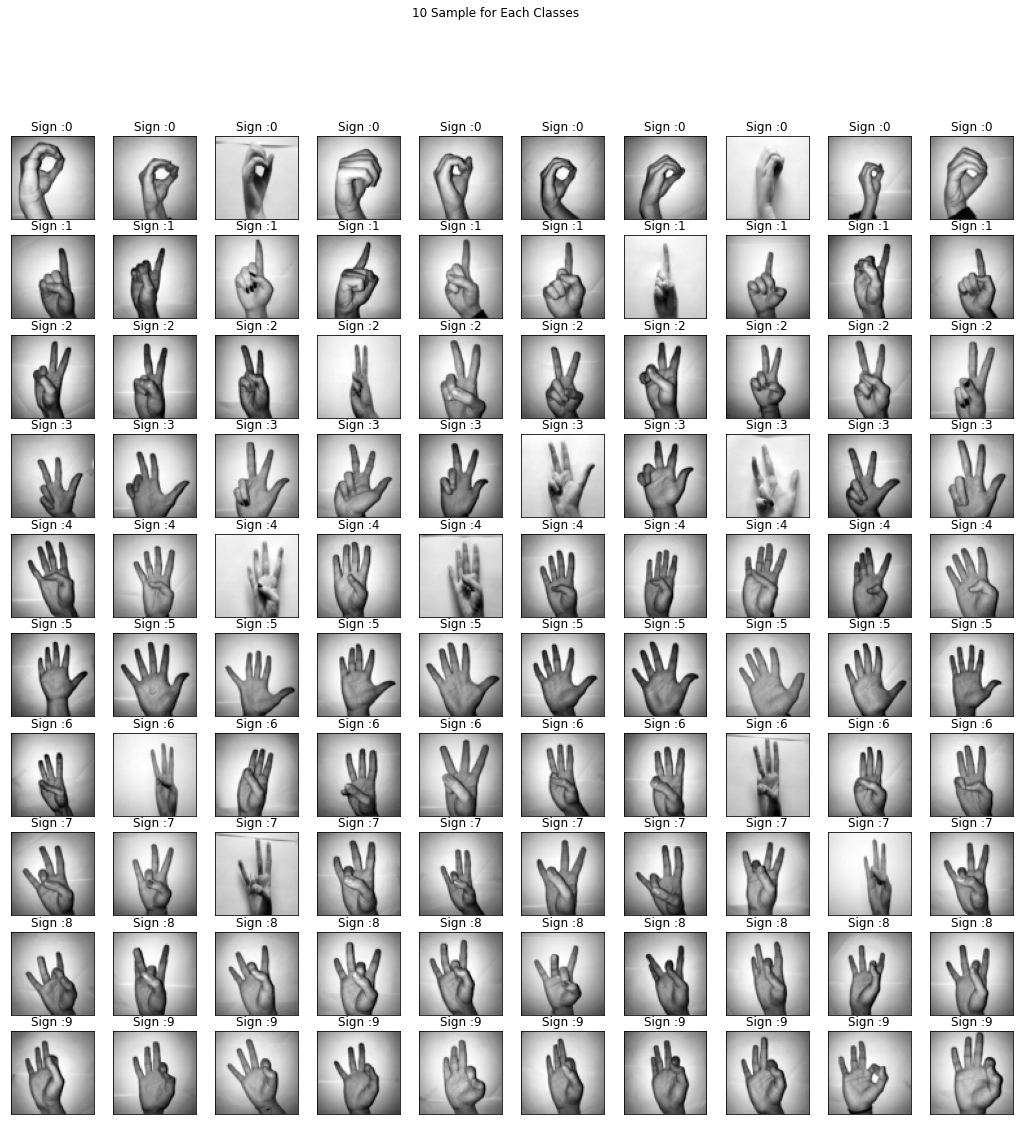

In [33]:
show_image_classes(image=X, label=y.copy())

In [37]:
def build_conv_model_1():
    model=Sequential()
    
    model.add(layers.Conv2D(64, kernel_size=(3,3),
                           padding="same",
                           activation="relu", 
                           input_shape=(64, 64,1)))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(number_of_classes, activation="softmax"))
        
    return model

[INFO]:Convolutional Model 1 created...
[INFO]:Convolutional Model 1 compiled...
[INFO]:Convolutional Model 1 training....
[INFO]:Convolutional Model 1 trained....
[INFO]:Train Accuracy:0.852
[INFO]:Validation Accuracy:0.785


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pedro/.local/lib/python3.6/site-packages/pandas

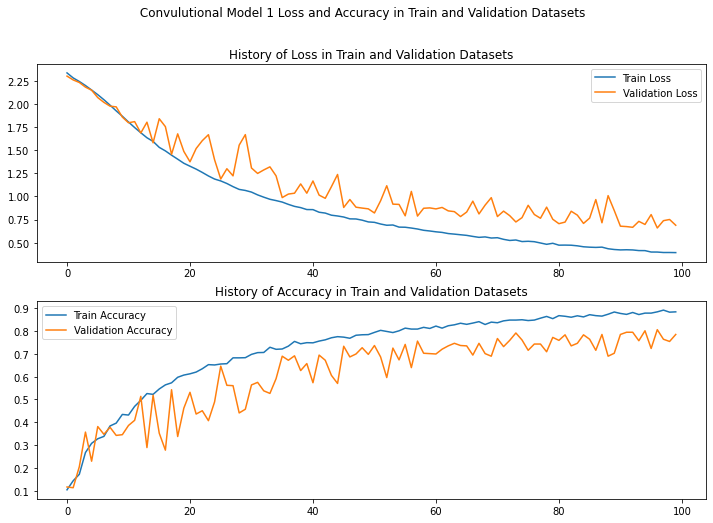

In [38]:
trained_models=dict()
model=build_conv_model_1()
trained_model_1=evaluate_conv_model(model=model, model_name=1, X=X, y=y)

#Will be used for serialization

In [39]:
def build_conv_model_2():
    model = Sequential()
    model.add(layers.Convolution2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
       
    model.add(layers.Convolution2D(64, (3, 3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
        
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
      
    return model


[INFO]:Convolutional Model 2 created...
[INFO]:Convolutional Model 2 compiled...
[INFO]:Convolutional Model 2 training....
Epoch 00065: early stopping
[INFO]:Convolutional Model 2 trained....
[INFO]:Train Accuracy:0.998
[INFO]:Validation Accuracy:0.864


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pedro/.local/lib/python3.6/site-packages/pandas

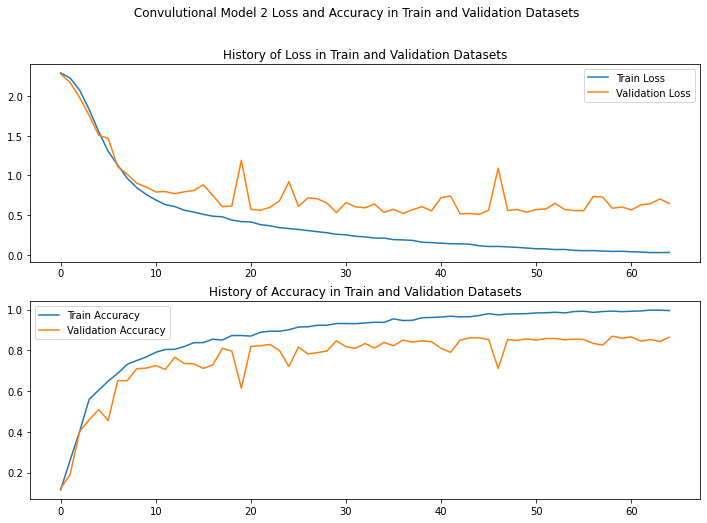

In [40]:
model=build_conv_model_2()
trained_model_2=evaluate_conv_model(model=model, model_name=2, X=X, y=y)

#Will be used for serialization

In [41]:
def build_conv_model_5():
    model = Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
       
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
        
    return model

[INFO]:Convolutional Model 5 created...
[INFO]:Convolutional Model 5 compiled...
[INFO]:Convolutional Model 5 training....
[INFO]:Convolutional Model 5 trained....
[INFO]:Train Accuracy:0.958
[INFO]:Validation Accuracy:0.906


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pedro/.local/lib/python3.6/site-packages/pandas

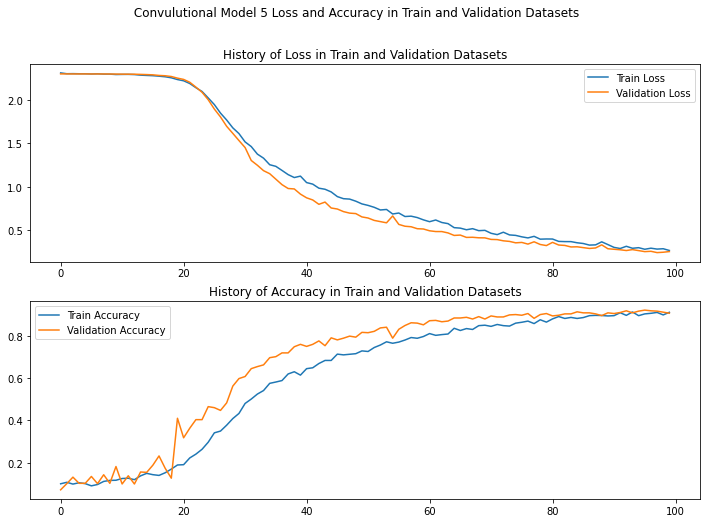

In [42]:
model=build_conv_model_5()
trained_model_5=evaluate_conv_model(model=model, model_name=5, X=X, y=y)


In [43]:
testLables = ['0', '1', '2' ,'3', '4', '5', '6', '7', '8', '9']
X_train, X_test, y_train, y_test = split_dataset(X, y)
predictions = model.predict(X_train,batch_size=10,verbose=0)
predictions
rPredictions = model.predict_classes(X_test, batch_size=10, verbose=0)
rLabels = np.argmax(y_test, axis=1)
confusionMatrix = confusion_matrix(rLabels, rPredictions)

In [44]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

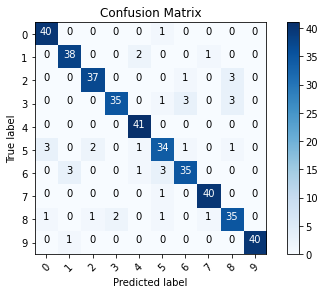

In [45]:
plot_confusion_matrix(confusionMatrix, testLables)

In [53]:
#X_train, X_test, y_train, y_test = split_dataset(X, y)
#model = trained_models["model_5"][0]
results = model.evaluate(X_test, y_test, verbose=1)
print("Loss: " + str(results[0]))
print("Accuracy: " + str(results[1]))

413/413 [==============================] - 0s 902us/step
Loss: 0.7052285207241558
Accuracy: 0.8595641851425171


In [60]:
acc = accuracy_score(rLabels, rPredictions)
pre = precision_score(rLabels, rPredictions, average='micro')
recal = recall_score(rLabels, rPredictions, average='micro')
f1 = f1_score(rLabels, rPredictions, average='micro')
print(acc)
print(pre)
print(recal)
print(f1)

0.9079903147699758
0.9079903147699758
0.9079903147699758
0.9079903147699758
